In [1]:
import os, cv2
import numpy as np
import pandas as pd
import random, tqdm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
import os
import glob
import torch
import cv2
import torch.nn as nn
from torch.utils.data import DataLoader
import albumentations as album
import segmentation_models_pytorch as smp
from PIL import Image
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

In [2]:
DATA_DIR = os.path.join(".", "VOCdevkit", "VOC2010")
ANNOTATIONS_DIR = os.path.join(DATA_DIR, "Annotations")
IMAGESETS_DIR = os.path.join(DATA_DIR, "ImageSets")
JPEGIMAGES_DIR = os.path.join(DATA_DIR, "JPEGImages")
SEGMENTATIONCLASS_DIR = os.path.join(DATA_DIR, "SegmentationClass")
SEGMENTATIONOBJECT_DIR = os.path.join(DATA_DIR, "SegmentationObject")

In [8]:
test_number = "2008_000002"

In [9]:
jpeg_img = glob.glob(os.path.join(JPEGIMAGES_DIR, test_number + "*"))[0]
#seg_class_img = glob.glob(os.path.join(SEGMENTATIONCLASS_DIR, test_number + "*"))[0]
#seg_obj_img = glob.glob(os.path.join(SEGMENTATIONOBJECT_DIR, test_number + "*"))[0]

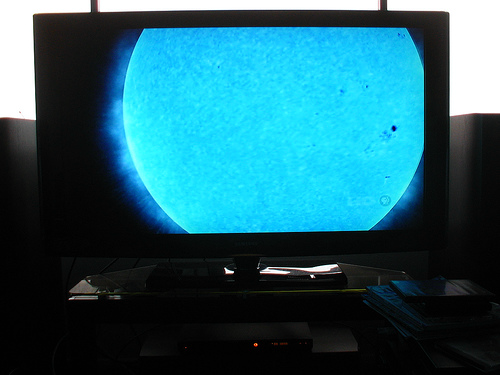

In [10]:
display(Image.fromarray(cv2.imread(jpeg_img)))
#display(Image.fromarray(cv2.imread(seg_class_img)))
#display(Image.fromarray(cv2.imread(seg_obj_img)))

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Jun 26 20:46:56 2014', '__version__': '1.0', '__globals__': [], 'LabelMap': array([[454, 454, 454, ..., 454, 454, 454],
       [454, 454, 454, ..., 454, 454, 454],
       [454, 454, 454, ..., 454, 454, 454],
       ...,
       [431, 431, 431, ..., 273, 273, 273],
       [431, 431, 431, ..., 273, 273, 273],
       [431, 431, 431, ..., 273, 273, 273]], dtype=uint16)}
{454, 427, 397, 431, 273}


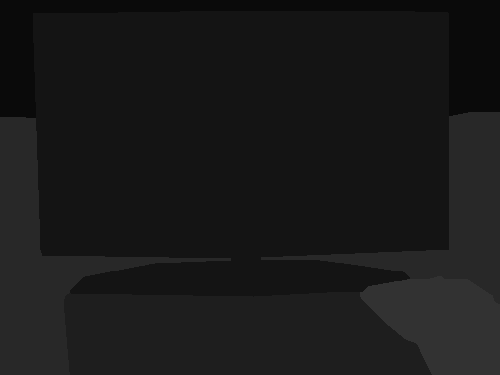

In [19]:
CONTEXT_DIR =  os.path.join(".", "trainval")
trainval_mat = glob.glob(os.path.join(CONTEXT_DIR, test_number + "*"))[0]
import scipy.io

mat = scipy.io.loadmat(trainval_mat)
print(mat)
label_map = np.array(mat["LabelMap"])
labels = set(label_map.reshape(label_map.shape[0] * label_map.shape[1]))
for i, label in enumerate(labels):
    label_map[label_map == label] = (i+1) * 10
label_map = np.array(label_map, dtype = np.uint8)

display(Image.fromarray(label_map))

{64, 0, 128, 192}
[[[ 64 192   0]
  [ 64 192   0]
  [ 64 192   0]
  ...
  [ 64 192  64]
  [ 64 192  64]
  [ 64 192  64]]

 [[ 64 192   0]
  [ 64 192   0]
  [ 64 192   0]
  ...
  [ 64 192  64]
  [ 64 192  64]
  [ 64 192  64]]

 [[ 64 192   0]
  [ 64 192   0]
  [ 64 192   0]
  ...
  [ 64 192  64]
  [ 64 192  64]
  [ 64 192  64]]

 ...

 [[  0   0  64]
  [  0   0  64]
  [  0   0  64]
  ...
  [  0   0  64]
  [  0   0  64]
  [  0   0  64]]

 [[  0   0  64]
  [  0   0  64]
  [  0   0  64]
  ...
  [  0   0  64]
  [  0   0  64]
  [  0   0  64]]

 [[  0   0  64]
  [  0   0  64]
  [  0   0  64]
  ...
  [  0   0  64]
  [  0   0  64]
  [  0   0  64]]]


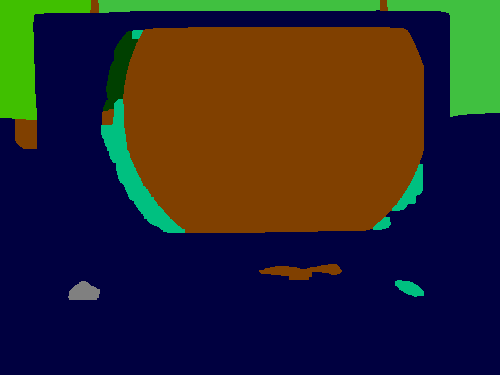

In [20]:
CONTEXT_DIR =  os.path.join("..", "59_context_labels")
context_path = glob.glob(os.path.join(CONTEXT_DIR, test_number + "*"))[0]
context_img = cv2.imread(context_path)

labels = set(context_img.reshape(context_img.shape[0] * context_img.shape[1] * context_img.shape[2] ))
print(labels)
print(context_img)

display(Image.fromarray(context_img))

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


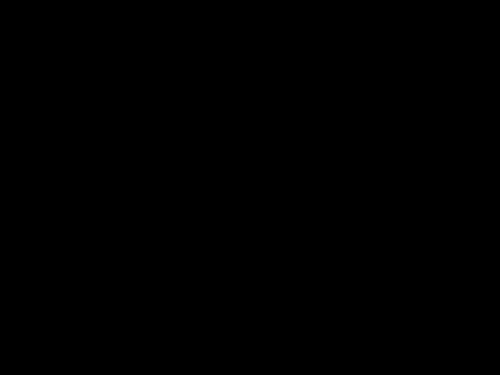

In [26]:
pic_path = "/mnt/yatsu/delete_sky/VOCdevkit/VOC2010/SegmentationClass/pre_encoded/2010_003251.png"
pic = cv2.imread(pic_path)
print(pic)
display(Image.fromarray(pic))